In [1]:
#Importing necessary packages
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_regression, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
!pip install umap-learn
import umap
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import savefig
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 832.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9925ea5a501b20ce71fe5248dfe61f392ba2123f7e52b4934d6cb0fec7b4dc5e
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=0222a467055d3af63029cf89aece6e096c117c9ef13225ab80f28d745b78d28e
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [2]:
#Allowing Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the file
path = '/content/drive/MyDrive/Colab Notebooks/01. MSiA421/421_Project/'
df = pd.read_csv(path+'data.csv')
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


### Dimensionality Reduction Techniques

In [6]:
#Ordering data
df = df.sort_values(by=['Bankrupt?'], ascending=False).reset_index(drop=True)
df['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [7]:
df_nolabel = df.drop(columns = ['Bankrupt?'], axis = 1)
df_nolabel

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.367084,0.398114,0.389528,0.598913,0.598913,0.998985,0.796949,0.808831,0.302721,0.781055,...,0.701446,0.001911,0.623689,0.598911,0.824230,0.292176,0.026697,0.564666,1,0.015765
2,0.374202,0.433330,0.418705,0.598416,0.598488,0.998871,0.797194,0.809133,0.303388,0.781367,...,0.712525,0.004372,0.623522,0.598412,0.827981,0.288898,0.026632,0.564262,1,0.017041
3,0.472188,0.517335,0.504470,0.601299,0.601299,0.998970,0.797385,0.809288,0.303515,0.781544,...,0.785071,0.000334,0.623791,0.601297,0.838588,0.287314,0.027857,0.567689,1,0.017895
4,0.446497,0.495475,0.493763,0.606473,0.606423,0.998907,0.797282,0.809207,0.303468,0.781452,...,0.768935,0.000564,0.623540,0.606475,0.836306,0.287988,0.026529,0.563500,1,0.017506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.477453,0.536797,0.527973,0.607460,0.607460,0.998963,0.797394,0.809320,0.303545,0.781578,...,0.798986,0.002193,0.623835,0.607461,0.840264,0.278683,0.026892,0.565597,1,0.034423
6815,0.562229,0.639937,0.618234,0.664351,0.664351,0.999346,0.797941,0.809810,0.303701,0.782086,...,0.855282,0.005388,0.623911,0.664350,0.843431,0.276302,0.026791,0.565158,1,0.069954
6816,0.513479,0.561873,0.556721,0.604289,0.604289,0.999021,0.797453,0.809355,0.303526,0.781634,...,0.813230,0.000535,0.624089,0.604291,0.841547,0.280627,0.026791,0.565158,1,0.026512
6817,0.448642,0.529274,0.496012,0.642586,0.642586,0.999004,0.797384,0.809296,0.303442,0.781380,...,0.795010,0.000732,0.624039,0.642584,0.839993,0.275249,0.026797,0.565187,1,0.180830


In [8]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()

#Scaling original dataframe 
df_scaled = std_scaler.fit_transform(df_nolabel.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_nolabel.columns)

In [9]:
#n to determine number of components to use
n = 2

### 1. PCA

##### NON - STANDARDIZED DATA

In [16]:
pca = PCA(n_components = n)
pca_fit = pca.fit_transform(df_nolabel)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2
0,2.165330e+09,-3.814949e+07
1,6.112053e+08,-4.715889e+09
2,2.069800e+09,-8.370298e+08
3,7.074361e+09,2.010361e+09
4,7.073880e+09,1.344989e+09
...,...,...
6814,-4.441724e+09,6.315858e+09
6815,-2.782227e+09,-1.737819e+09
6816,-2.982956e+09,-3.510152e+09
6817,-2.666382e+09,-2.873975e+09


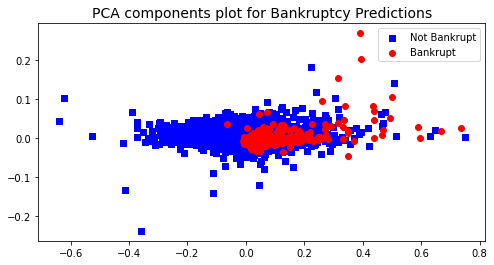

In [21]:
# Create plot from transformed dataset
X_pca = pca.fit(df_nolabel.iloc[:, 0:n]).transform(df_nolabel.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_pca[220:,0], X_pca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_pca[0:219,0], X_pca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

##### STANDARDIZED DATA

In [10]:
pca = PCA(n_components = n)
pca_fit = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2
0,0.389698,-0.196544
1,-0.207320,0.514738
2,0.155644,0.220383
3,0.440990,0.629480
4,0.660192,0.285310
...,...,...
6814,-0.399500,-0.209462
6815,-0.500601,0.211695
6816,-0.637453,0.502169
6817,-0.332355,-0.048867


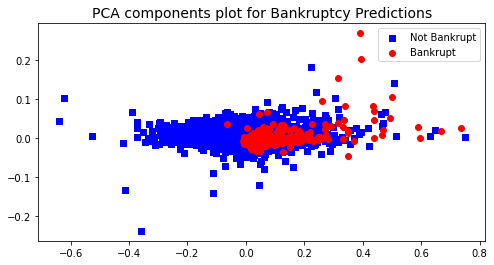

In [13]:
# Create plot from transformed dataset
X_pca = pca.fit(df_scaled.iloc[:, 0:n]).transform(df_scaled.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_pca[220:,0], X_pca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_pca[0:219,0], X_pca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

### 2. k-PCA

##### NON-STANDARDIZED DATA

In [19]:
kpca = KernelPCA(n_components=n, kernel='rbf')
kpca_fit = kpca.fit_transform(df_nolabel)
df_kpca = pd.DataFrame(data = kpca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_kpca

,PC 1,PC 2
0,-0.008477,-0.001322
1,-0.008477,-0.001322
2,-0.008477,-0.001322
3,-0.008477,-0.001322
4,-0.008477,-0.001322
...,...,...
6814,-0.008477,-0.001322
6815,-0.008477,-0.001322
6816,-0.008477,-0.001322
6817,-0.008477,-0.001322


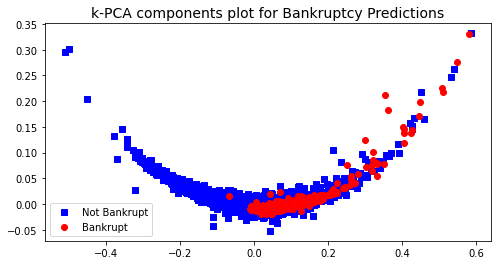

In [20]:
# Create plot from transformed dataset
X_kpca = kpca.fit(df_nolabel.iloc[:, 0:n]).transform(df_nolabel.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_kpca[220:,0], X_kpca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_kpca[0:219,0], X_kpca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("k-PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

##### STANDARDIZED DATA

In [14]:
kpca = KernelPCA(n_components=n, kernel='rbf')
kpca_fit = kpca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = kpca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2
0,0.055771,0.028667
1,-0.029335,-0.074343
2,0.022471,-0.031556
3,0.064076,-0.089834
4,0.095175,-0.040387
...,...,...
6814,-0.057125,0.029934
6815,-0.071847,-0.030952
6816,-0.090722,-0.072619
6817,-0.048256,0.006642


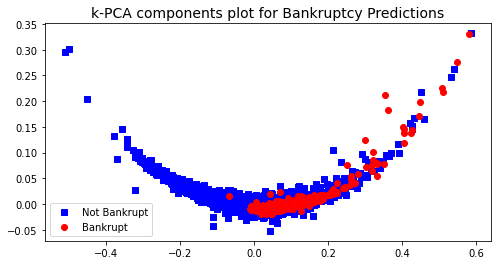

In [15]:
# Create plot from transformed dataset
X_kpca = kpca.fit(df_scaled.iloc[:, 0:n]).transform(df_scaled.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_kpca[220:,0], X_kpca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_kpca[0:219,0], X_kpca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("k-PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

#### 3. t-SNE

In [ ]:
tsne = TSNE(n_components=n, learning_rate='auto', init='random', perplexity=3, method='exact')
tsne_fit = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data = tsne_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_tsne

KeyboardInterrupt: ignored

In [ ]:
plt.scatter(tsne_fit[:,0], tsne_fit[:,1], c=df['Bankrupt?'])
plt.title("t-SNE Embedding")

#### 4. U-MAP

In [ ]:
umap_fn = umap.UMAP(n_components=n, metric='correlation')
umap_fit = umap_fn.fit_transform(df_scaled)
df_umap = pd.DataFrame(data = umap_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_umap

KeyboardInterrupt: ignored

In [ ]:
# Create plot from transformed dataset
import plotly.express as px
import plotly.graph_objects as go 

fig = px.scatter(
    umap_fit, x=0, y=1,
    color=df['Bankrupt?'], labels={'color': 'bankrupt_status'}
)

fig.update_layout(
    title=go.layout.Title(
        text="U-MAP Seperation",
        xref="paper",
        x=0
    ))

fig.show()

### To print to HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/DR_v1.ipynb

[NbConvertApp] Converting notebook /content/DR_v1.ipynb to html
[NbConvertApp] Writing 410771 bytes to /content/DR_v1.html
